# The objective of this project is to build a Convolution Neural Network Algorithm to classify Metal Surface Defects. 


## About Dataset
This dataset was downloaded from NEU Metal Surface Defects Databse which contains six kinds of typical surface defects of the hot-rolled steel strip are collected, i.e., rolled-in scale (RS), patches (Pa), crazing (Cr), pitted surface (PS), inclusion (In) and scratches (Sc). The database includes 1,800 grayscale images: 300 samples each of six different kinds of typical surface defects.

## Language/Algorithm and Framework used :
    -Numpy
    -Pandas
    -Tensorflow
    -Data Augmentation
    -Convolution Neural Network
    -Deep Learning
    -Python

In [ ]:
# !pip install opendatasets
# import opendatasets as od
# od.download("https://www.kaggle.com/datasets/fantacher/neu-metal-surface-defects-data")

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_data = "neu-metal-surface-defects-data/NEU Metal Surface Defects Data/train"
valid_data = "neu-metal-surface-defects-data/NEU Metal Surface Defects Data/valid"
test_data = "neu-metal-surface-defects-data/NEU Metal Surface Defects Data/test"

## We use Data Augmentation Below
The following code sets up data generators for image preprocessing during training and validation. It rescales images, applies shear, zoom, and horizontal flip augmentation, then flows images in batches of 10 to train and validate models for categorical classification tasks with a target image size of 200x200.

In [4]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_data,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        valid_data,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


### Custom Callback and Convolutional Neural Network Architecture
- custom callback named custom_callback is defined to monitor training progress
- sequential Convolutional Neural Network (CNN) model is constructed for image classification, comprising multiple convolution and pooling layers followed by fully connected layers and dropout regularization

In [5]:
class custom_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.978 ):
            print("\nReached 97.8% accuracy so cancelling training!")
            self.model.stop_training = True 
            
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0

### Model Compilation, Training, and Callback Implementation
 - CNN model is compiled with categorical cross-entropy loss, RMSprop optimizer, and accuracy as the evaluation metric
 - The model is then trained using the fit function, utilizing the train_generator for training data and validation_generator for validation data. 

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

callbacks = custom_callback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=15,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Compiled!
Epoch 1/15
166/166 [==============================] - 58s 344ms/step - loss: 0.9524 - accuracy: 0.8798 - val_loss: 0.3360 - val_accuracy: 0.9167
Epoch 2/15
166/166 [==============================] - 59s 358ms/step - loss: 0.7605 - accuracy: 0.8720 - val_loss: 0.3690 - val_accuracy: 0.9167
Epoch 3/15
166/166 [==============================] - 62s 372ms/step - loss: 1.4013 - accuracy: 0.8943 - val_loss: 0.2528 - val_accuracy: 0.9167
Epoch 4/15
166/166 [==============================] - 60s 358ms/step - loss: 0.4972 - accuracy: 0.9112 - val_loss: 0.1413 - val_accuracy: 0.9583
Epoch 5/15
166/166 [==============================] - 60s 361ms/step - loss: 0.5990 - accuracy: 0.8901 - val_loss: 0.0888 - val_accuracy: 0.9722
Epoch 6/15
166/166 [==============================] - 61s 369ms/step - loss: 1.4201 - accuracy: 0.8889 - val_loss: 0.9168 - val_accuracy: 0.7361
Epoch 7/15
166/166 [==============================] - 65s 390ms/step - loss: 0.4378 - accuracy: 0.9149 - val_loss: 0.053

### Training History Visualization
-  utilizes Matplotlib for visualization of the training history

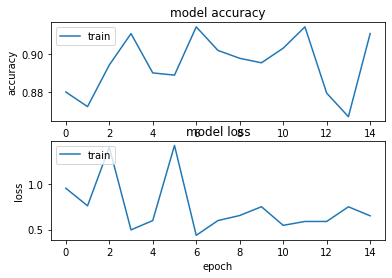

In [32]:
import matplotlib.pyplot as plt 
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])   
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train'], loc='upper left')  
plt.show()

### Test Data Loading and Preprocessing
- Images are loaded, converted to arrays, and normalized to the range [0, 1]. This process prepares the test data for evaluation with the trained model.

In [33]:
# loading data from a test_dir directory into a format

from sklearn.datasets import load_files
import numpy as np

test_dir = test_data

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_dir)

no_of_classes = len(np.unique(y_test))
no_of_classes

from keras.utils import np_utils
y_test = np_utils.to_categorical(y_test,no_of_classes) 

# We just have the file names in the x set. Let's load the images and convert them into array.
from keras_preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

x_test = x_test.astype('float32')/255

Test set shape :  (72, 200, 200, 3)


### Test Prediction Visualization
In the below code, test predictions from the trained model (y_pred) are plotted alongside a random sample of test images. For each image in the sample, the predicted label and ground truth label are displayed, with correct predictions in green and incorrect predictions in red. This visualization provides insight into the model's performance on the test data.

3/3 [==============================] - 0s 82ms/step


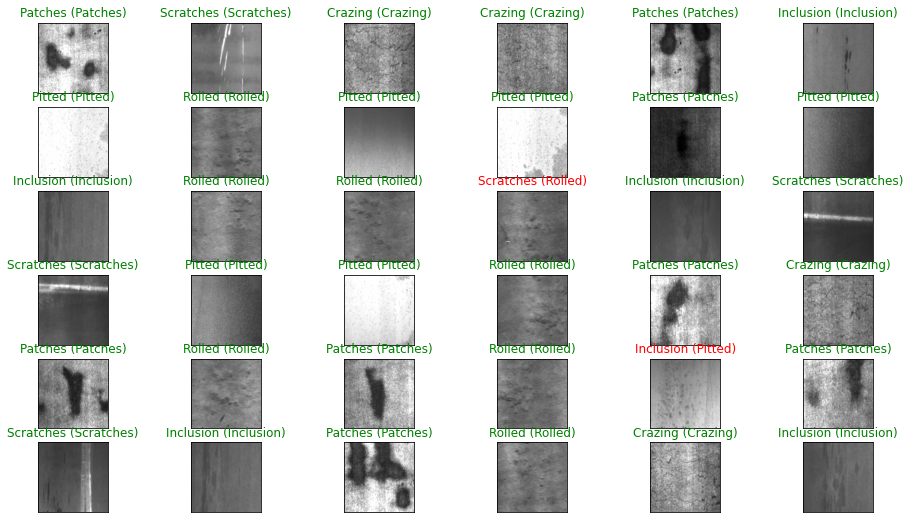

In [36]:
# Let's visualize test prediction.
import matplotlib.pyplot as plt 
y_pred = model.predict(x_test)

# plot a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=36, replace=False)):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

### Model Evaluation: Classification Report 
The provided code calculates and prints a comprehensive evaluation of the trained model's performance on the test dataset. It includes a detailed classification report showcasing metrics such as 
- precision, 
- recall, 
- F1-score
- support 
for each class

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate predictions for the test set
y_pred = model.predict(x_test)

# Calculate and print the classification report
report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_labels)
print("Classification Report:\n", report)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print("Confusion Matrix:\n", conf_matrix)


3/3 [==============================] - 0s 87ms/step
Classification Report:
               precision    recall  f1-score   support

     Crazing       1.00      1.00      1.00        12
   Inclusion       0.80      1.00      0.89        12
     Patches       1.00      1.00      1.00        12
      Pitted       1.00      0.75      0.86        12
      Rolled       1.00      0.92      0.96        12
   Scratches       0.92      1.00      0.96        12

    accuracy                           0.94        72
   macro avg       0.95      0.94      0.94        72
weighted avg       0.95      0.94      0.94        72

Confusion Matrix:
 [[12  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  3  0  9  0  0]
 [ 0  0  0  0 11  1]
 [ 0  0  0  0  0 12]]


In [35]:
model.save("my_model3")

INFO:tensorflow:Assets written to: my_model3\assets


INFO:tensorflow:Assets written to: my_model3\assets
